In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, recall_score, precision_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('dataset.csv')
df.columns = [i for i in range(df.shape[1])]
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
2,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
3,0.537071,0.654284,-1.232646e-06,0.411754,0.583218,-0.009832,0.332661,0.440461,-0.035058,0.278217,...,0.573624,0.160745,-0.126689,0.450552,0.169927,-0.140563,0.371780,0.227881,-0.139377,0
4,0.573701,0.790903,-1.802477e-06,0.411161,0.634531,0.049998,0.369645,0.466972,0.035773,0.311497,...,0.493991,0.198931,-0.242835,0.354692,0.179883,-0.242110,0.264751,0.210932,-0.233512,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
694,0.426485,0.825062,1.911383e-07,0.309584,0.725670,-0.053612,0.242475,0.567717,-0.088864,0.228574,...,0.709347,0.373958,-0.047813,0.753457,0.302843,-0.043922,0.785530,0.235719,-0.039420,9
695,0.465630,0.826852,3.573945e-07,0.341685,0.743758,-0.059271,0.268542,0.588716,-0.090873,0.277955,...,0.689323,0.369611,-0.032928,0.728266,0.302781,-0.024977,0.757090,0.243095,-0.015393,9
696,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9
697,0.441862,0.829462,1.626848e-07,0.323772,0.731566,-0.054063,0.249555,0.576212,-0.089838,0.219921,...,0.715368,0.362255,-0.050393,0.759282,0.289426,-0.042339,0.791105,0.221666,-0.034230,9


In [3]:
df = df.rename(columns={63: 'Output'})
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,Output
0,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
2,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
3,0.537071,0.654284,-1.232646e-06,0.411754,0.583218,-0.009832,0.332661,0.440461,-0.035058,0.278217,...,0.573624,0.160745,-0.126689,0.450552,0.169927,-0.140563,0.371780,0.227881,-0.139377,0
4,0.573701,0.790903,-1.802477e-06,0.411161,0.634531,0.049998,0.369645,0.466972,0.035773,0.311497,...,0.493991,0.198931,-0.242835,0.354692,0.179883,-0.242110,0.264751,0.210932,-0.233512,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
694,0.426485,0.825062,1.911383e-07,0.309584,0.725670,-0.053612,0.242475,0.567717,-0.088864,0.228574,...,0.709347,0.373958,-0.047813,0.753457,0.302843,-0.043922,0.785530,0.235719,-0.039420,9
695,0.465630,0.826852,3.573945e-07,0.341685,0.743758,-0.059271,0.268542,0.588716,-0.090873,0.277955,...,0.689323,0.369611,-0.032928,0.728266,0.302781,-0.024977,0.757090,0.243095,-0.015393,9
696,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9
697,0.441862,0.829462,1.626848e-07,0.323772,0.731566,-0.054063,0.249555,0.576212,-0.089838,0.219921,...,0.715368,0.362255,-0.050393,0.759282,0.289426,-0.042339,0.791105,0.221666,-0.034230,9


In [4]:
X = df.iloc[:, :-1]
print("Features shape =", X.shape)

Y = df.iloc[:, -1]
print("Labels shape =", Y.shape)

Features shape = (699, 63)
Labels shape = (699,)


In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
svm = SVC(C=10, gamma=0.1, kernel='rbf')
svm.fit(x_train, y_train)

SVC(C=10, gamma=0.1)

In [6]:
y_pred = svm.predict(x_test)
y_pred

array([6, 7, 0, 6, 0, 0, 3, 0, 3, 1, 9, 9, 3, 5, 1, 5, 9, 5, 9, 7, 0, 8,
       0, 0, 0, 0, 5, 7, 8, 0, 4, 8, 5, 1, 2, 9, 7, 4, 4, 4, 5, 0, 6, 2,
       0, 3, 9, 8, 6, 8, 4, 5, 5, 3, 3, 5, 6, 7, 0, 1, 5, 3, 5, 5, 0, 0,
       3, 5, 6, 8, 0, 0, 0, 6, 9, 3, 7, 7, 3, 4, 9, 3, 4, 6, 9, 8, 1, 9,
       6, 3, 2, 3, 7, 3, 0, 0, 0, 2, 0, 3, 2, 9, 1, 0, 0, 7, 9, 3, 0, 9,
       6, 4, 4, 8, 5, 2, 6, 0, 4, 0, 1, 2, 1, 0, 7, 0, 0, 0, 5, 6, 3, 0,
       0, 3, 5, 5, 9, 7, 0, 0], dtype=int64)

In [7]:
cf_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
precision = precision_score(y_test, y_pred, average='micro')
f1, recall, precision

(0.8642857142857143, 0.8642857142857143, 0.8642857142857143)

In [8]:
svm = SVC(C=100, gamma=0.1, kernel='rbf')
svm.fit(x_train, y_train)
print("Training score =", svm.score(x_train, y_train))
y_pred = svm.predict(x_test)
print("Testing score =", accuracy_score(y_test, y_pred))

Training score = 0.8336314847942755
Testing score = 0.8642857142857143


<AxesSubplot:title={'center':'Confusion Matrix - Turkey Sign Language'}>

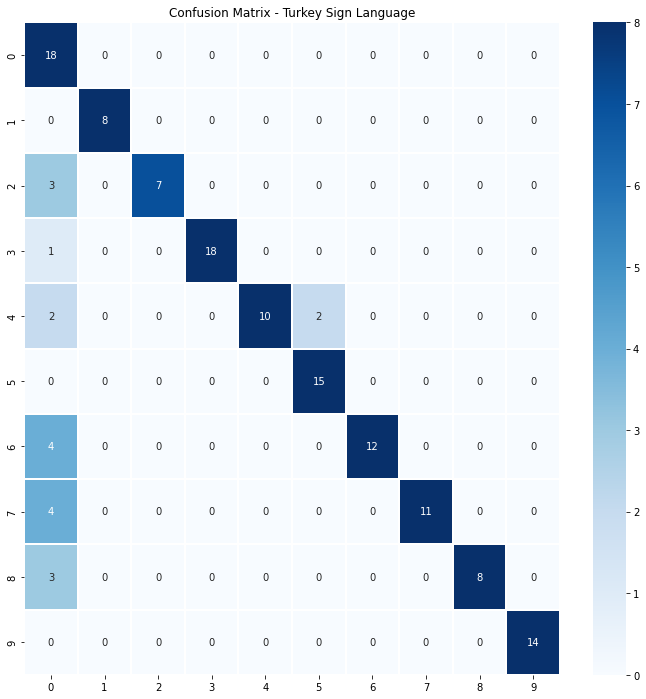

In [9]:
labels = sorted(list(set(df['Output'])))
labels = [x for x in labels]

fig, ax = plt.subplots(figsize=(12, 12))

ax.set_title("Confusion Matrix - Turkey Sign Language")

maping = sns.heatmap(cf_matrix, 
                     annot=True,
                     cmap = plt.cm.Blues, 
                     linewidths=.2,
                     xticklabels=labels,
                     yticklabels=labels, vmax=8,
                     fmt='g',
                     ax=ax
                    )
maping

In [10]:
import pickle

# save model
with open('model2.pkl','wb') as f:
    pickle.dump(svm,f)